In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [4]:
df.shape

(103, 7)

# Data Cleaning

In [5]:
df1 = df.copy()

In [6]:
df1

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [7]:
df1['Production (Tons)'] = df1['Production (Tons)'].str.replace('.',',')
df1['Production per Person (Kg)'] = df1['Production per Person (Kg)'].str.replace('.',',')
df1['Acreage (Hectare)'] = df1['Acreage (Hectare)'].str.replace('.',',')
df1['Yield (Kg / Hectare)'] = df1['Yield (Kg / Hectare)'].str.replace('.',',')

In [8]:
df1.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,"768,678,382","3,668,531","10,226,205","75,167,5"
1,1,India,Asia,"348,448,000",260721,"4,950,000","70,393,5"
2,2,China,Asia,"123,059,739",88287,"1,675,215","73,459,1"
3,3,Thailand,Asia,"87,468,496","1,264,303","1,336,575","65,442,2"
4,4,Pakistan,Asia,"65,450,704",324219,"1,130,820","57,879"


In [9]:
df1.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df1.rename(columns={'Production per Person (Kg)':'Production_per_Person_(Kg)'},inplace=True)
df1.rename(columns={'Acreage (Hectare)':'Average_(Hectare)'},inplace=True)
df1.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)

In [10]:
df1.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production(Tons)',
       'Production_per_Person_(Kg)', 'Average_(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

In [11]:
df1.drop(columns='Unnamed: 0',inplace=True)

In [12]:
df1.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,"768,678,382","3,668,531","10,226,205","75,167,5"
1,India,Asia,"348,448,000",260721,"4,950,000","70,393,5"
2,China,Asia,"123,059,739",88287,"1,675,215","73,459,1"
3,Thailand,Asia,"87,468,496","1,264,303","1,336,575","65,442,2"
4,Pakistan,Asia,"65,450,704",324219,"1,130,820","57,879"


In [13]:
df1.isnull().sum()

Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Average_(Hectare)             1
Yield(Kg/Hectare)             1
dtype: int64

In [14]:
df1[df1['Yield(Kg/Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [15]:
df1=df1.dropna().reset_index()

In [16]:
df1

,index,Country,Continent,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,"768,678,382","3,668,531","10,226,205","75,167,5"
1,1,India,Asia,"348,448,000",260721,"4,950,000","70,393,5"
2,2,China,Asia,"123,059,739",88287,"1,675,215","73,459,1"
3,3,Thailand,Asia,"87,468,496","1,264,303","1,336,575","65,442,2"
4,4,Pakistan,Asia,"65,450,704",324219,"1,130,820","57,879"
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,"43,596,5"
98,98,Lebanon,Asia,97,16,3,"28,386,4"
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,"11,949,8"


In [17]:
df1.drop(columns=['index'],axis=1,inplace=True)

In [18]:
df1

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,"768,678,382","3,668,531","10,226,205","75,167,5"
1,India,Asia,"348,448,000",260721,"4,950,000","70,393,5"
2,China,Asia,"123,059,739",88287,"1,675,215","73,459,1"
3,Thailand,Asia,"87,468,496","1,264,303","1,336,575","65,442,2"
4,Pakistan,Asia,"65,450,704",324219,"1,130,820","57,879"
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,"43,596,5"
98,Lebanon,Asia,97,16,3,"28,386,4"
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,"11,949,8"


In [19]:
df1.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production_per_Person_(Kg)    object
Average_(Hectare)             object
Yield(Kg/Hectare)             object
dtype: object

In [20]:
df1["Production(Tons)"] = df1["Production(Tons)"].str.replace(',','')
df1["Production(Tons)"] = df1["Production(Tons)"].astype(float)

In [21]:
df1["Production_per_Person_(Kg)"] = df1["Production_per_Person_(Kg)"].str.replace(',','')
df1["Production_per_Person_(Kg)"] = df1["Production_per_Person_(Kg)"].astype(float)
df1["Average_(Hectare)"] = df1["Average_(Hectare)"].str.replace(',','')
df1["Average_(Hectare)"] = df1["Average_(Hectare)"].astype(float)
df1["Yield(Kg/Hectare)"] = df1["Yield(Kg/Hectare)"].str.replace(',','')
df1["Yield(Kg/Hectare)"] = df1["Yield(Kg/Hectare)"].astype(float)

In [22]:
df1.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production_per_Person_(Kg)    float64
Average_(Hectare)             float64
Yield(Kg/Hectare)             float64
dtype: object

In [23]:
df1.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production_per_Person_(Kg)    101
Average_(Hectare)             101
Yield(Kg/Hectare)             102
dtype: int64

# Univariate Analysis

In [24]:
df1.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


# How many countries produce sugarcane from each continent?

In [25]:
df1['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

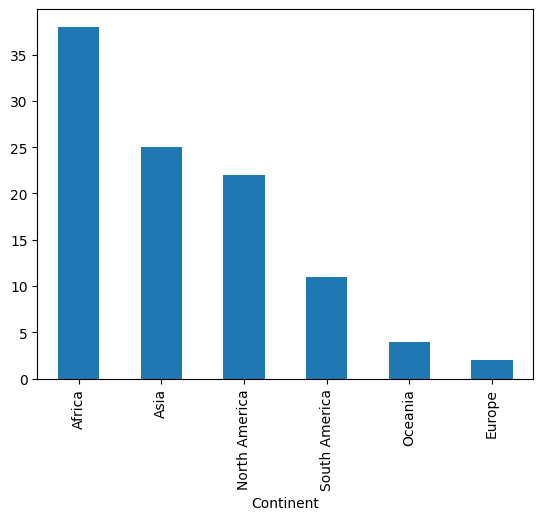

In [26]:
df1['Continent'].value_counts().plot(kind='bar',)

<Axes: ylabel='count'>

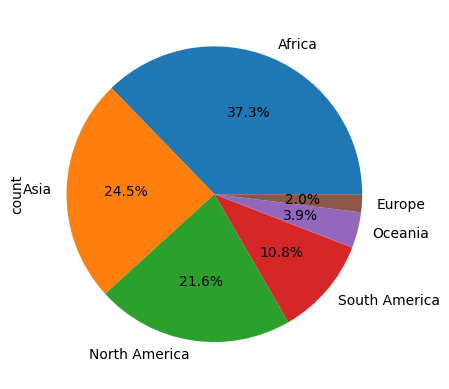

In [27]:
df1['Continent'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [28]:
df1.columns = df1.columns.str.strip()

In [29]:
df1.columns

Index(['Country', 'Continent', 'Production(Tons)',
       'Production_per_Person_(Kg)', 'Average_(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Count'>

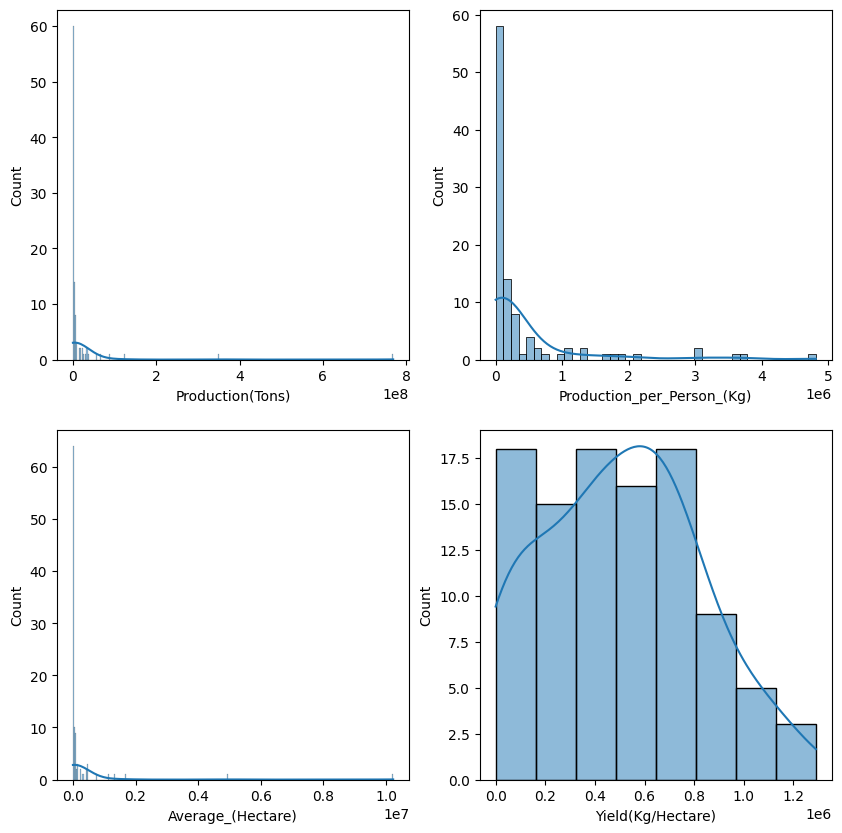

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df1['Production(Tons)'],kde=True)
plt.subplot(2,2,2)
sns.histplot(df1['Production_per_Person_(Kg)'],kde=True)
plt.subplot(2,2,3)
sns.histplot(df1['Average_(Hectare)'],kde=True)
plt.subplot(2,2,4)
sns.histplot(df1['Yield(Kg/Hectare)'],kde=True)

# Checking Outlier

<Axes: ylabel='Yield(Kg/Hectare)'>

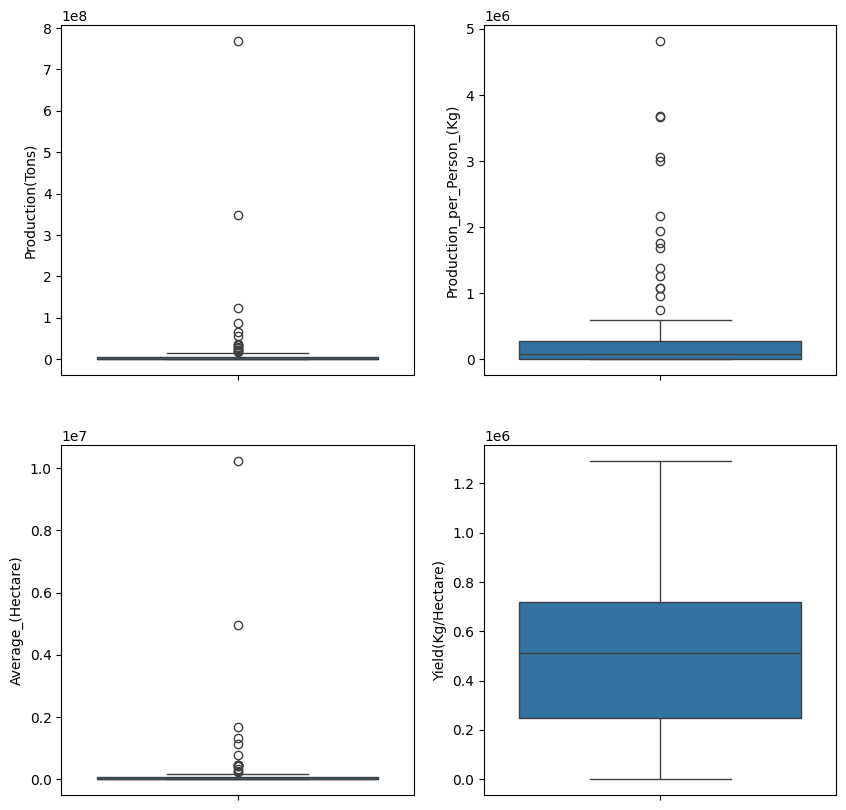

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df1['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df1['Production_per_Person_(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df1['Average_(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df1['Yield(Kg/Hectare)'])

In [32]:
df1.describe()

,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


# Which Country produces maximum sugarcane?

In [33]:
df_new = df1[['Country','Production(Tons)']].set_index("Country")

In [34]:
df_new['percentage'] = (df_new['Production(Tons)']/df_new['Production(Tons)'].sum())*100

In [35]:
df_new

,Production(Tons),percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


In [36]:
df_new.head(1)

,Production(Tons),percentage
Country,,
Brazil,768678382.0,40.727285


<Axes: ylabel='percentage'>

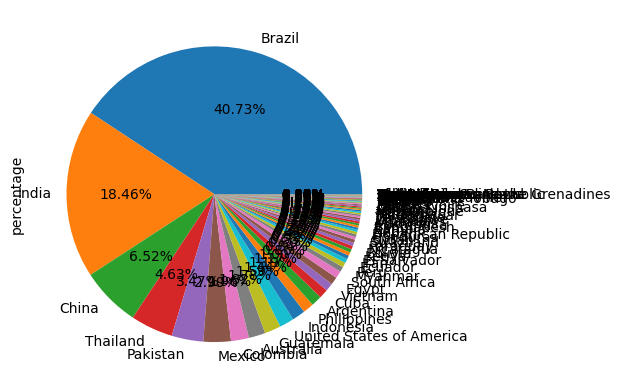

In [37]:
df_new['percentage'].plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='Country'>

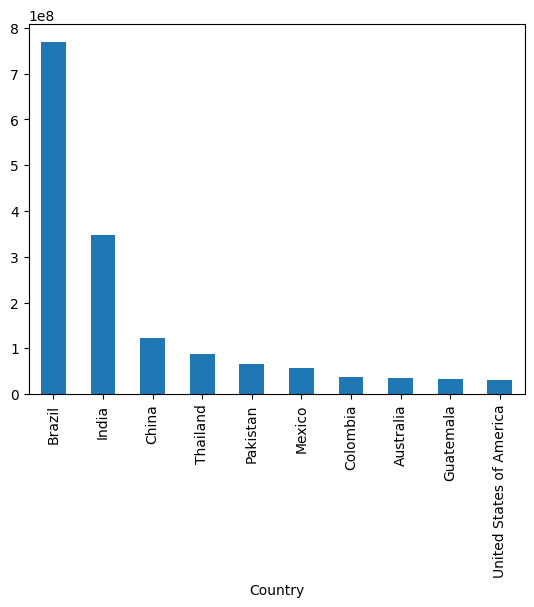

In [38]:
df_new['Production(Tons)'].head(10).plot(kind='bar')

C:\Users\dhana\AppData\Local\Temp\ipykernel_5356\953269359.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


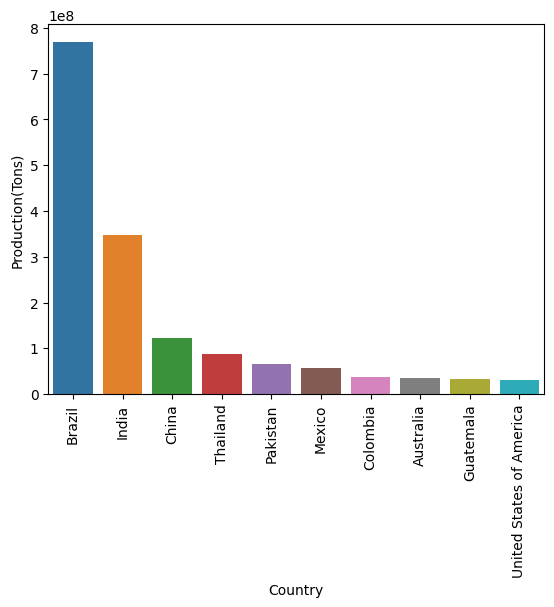

In [39]:
ax=sns.barplot(data=df_new.head(10),x='Country',y='Production(Tons)',hue='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Which Country have highest land ?

C:\Users\dhana\AppData\Local\Temp\ipykernel_5356\1581274403.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


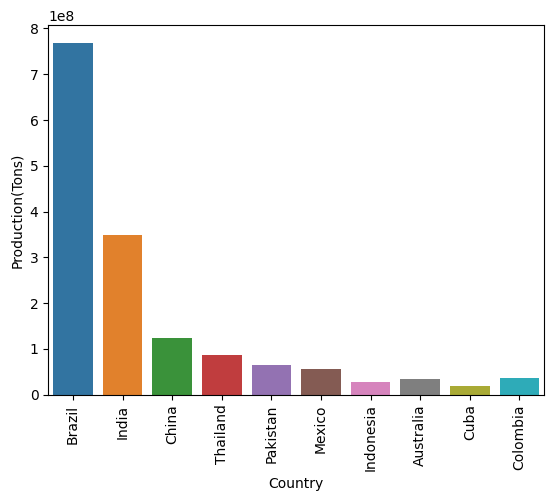

In [40]:
df_average_hectare=df1.sort_values('Average_(Hectare)',ascending=False)
ax=sns.barplot(data=df_average_hectare.head(10),x='Country',y='Production(Tons)',hue='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Which country have highest yield per hectare ?

C:\Users\dhana\AppData\Local\Temp\ipykernel_5356\380946056.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


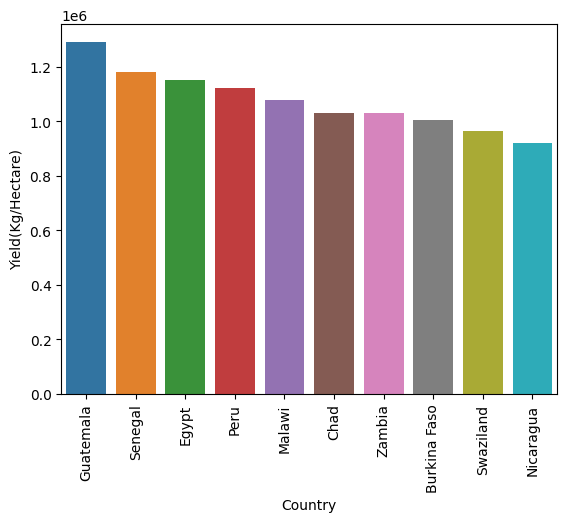

In [41]:
df_yield=df1.sort_values('Yield(Kg/Hectare)',ascending=False)
ax=sns.barplot(data=df_yield.head(10),x='Country',y='Yield(Kg/Hectare)',hue='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Which country has highest production?

C:\Users\dhana\AppData\Local\Temp\ipykernel_5356\1275443368.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


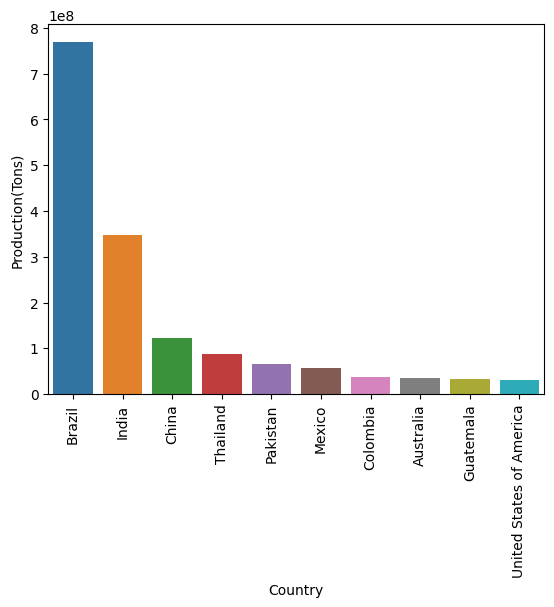

In [42]:
df_production = df1.sort_values('Production(Tons)',ascending=False)
ax=sns.barplot(data=df_production.head(10),x='Country',y='Production(Tons)',hue='Country')
#ax=sns.barplot(data=df_yield.head(10),x='Country',y='Yield(Kg/Hectare)',hue='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Correlation

In [43]:
df_ = df1[['Production(Tons)','Production_per_Person_(Kg)','Average_(Hectare)','Yield(Kg/Hectare)']]

In [44]:
df_.corr()

,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.352369,0.997550,0.121125
Production_per_Person_(Kg),0.352369,1.000000,0.341974,0.226719
Average_(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg/Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: >

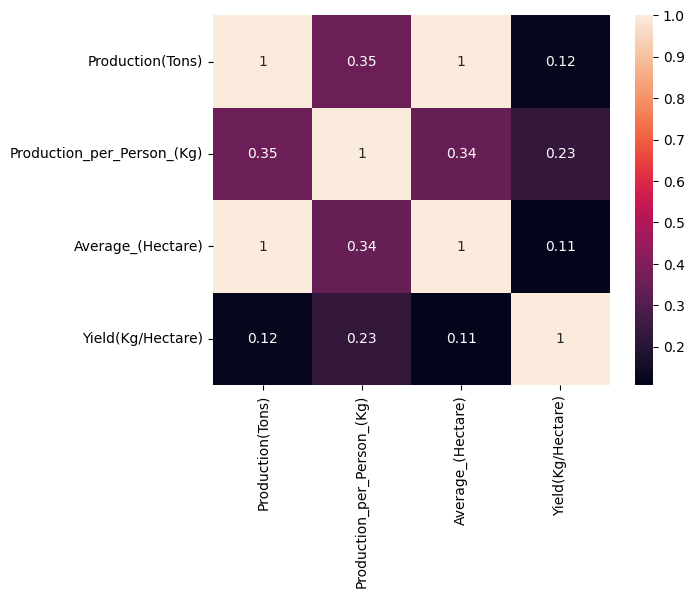

In [45]:
sns.heatmap(df_.corr(),annot=True)

# Do Countries with highest land produce more sugarcane

<Axes: xlabel='Average_(Hectare)', ylabel='Production(Tons)'>

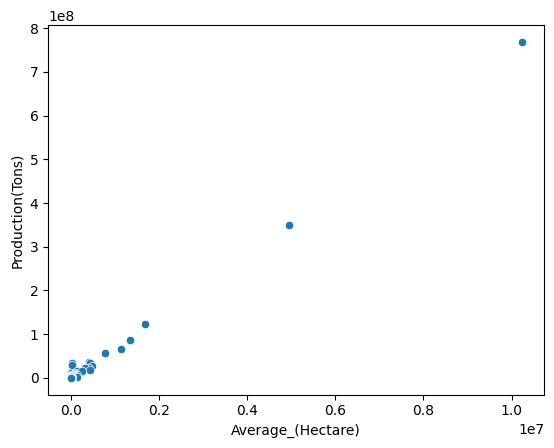

In [46]:
sns.scatterplot(data=df1,x='Average_(Hectare)',y='Production(Tons)')

# Do Countries which yield more sugarcane per hectare produces more sugarcane in total

NO


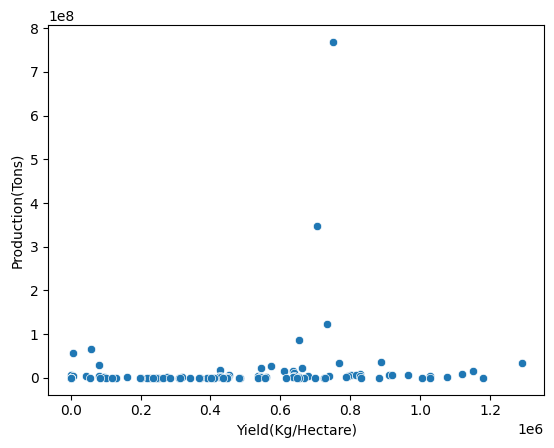

In [47]:
sns.scatterplot(data=df1,x='Yield(Kg/Hectare)',y='Production(Tons)',)
print("NO")

# Continent

In [48]:
df_continent=df1.groupby('Continent').sum()

In [49]:
df_continent.drop(columns=['Country'],inplace=True)
df_continent

,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,10144110.0,1439089.0,20700454.0
Asia,721930425.0,3120808.0,10608319.0,11197308.0
Europe,5823.0,536.0,71.0,1318709.0
North America,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,36177574.0,3158066.0,490909.0,1624191.0
South America,865588126.0,10228540.0,11369236.0,6766896.0


# Which continent produces more sugarcane?

In [50]:
df_continent.sort_values(by='Production(Tons)',ascending=False,inplace = True)
df_continent

,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare)
Continent,,,,
South America,865588126.0,10228540.0,11369236.0,6766896.0
Asia,721930425.0,3120808.0,10608319.0,11197308.0
North America,173995947.0,15420953.0,1581983.0,9581162.0
Africa,89681472.0,10144110.0,1439089.0,20700454.0
Oceania,36177574.0,3158066.0,490909.0,1624191.0
Europe,5823.0,536.0,71.0,1318709.0


<Axes: xlabel='Continent'>

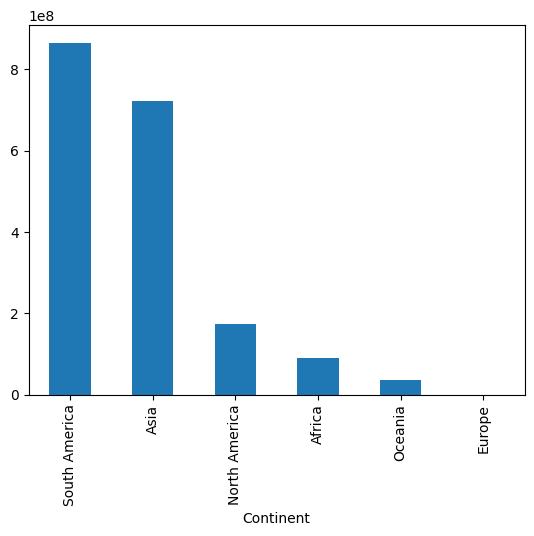

In [51]:
df_continent['Production(Tons)'].plot(kind='bar')

In [52]:
df1['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

# Which continent have highest land for sugarcane production ?

<Axes: xlabel='Continent'>

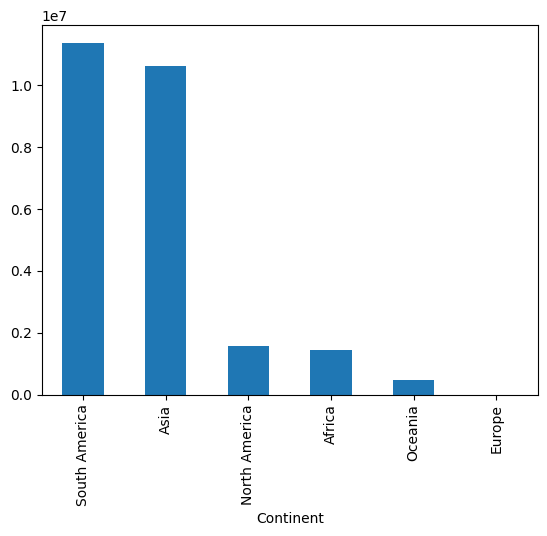

In [53]:
df_continent['Average_(Hectare)'].sort_values(ascending=False).plot(kind='bar')

# Do no. of countries in Continent effects production of sugarcane?

In [63]:
df_continent['number_of_countries'] = df1.groupby('Continent').count()['Country']

In [64]:
df_continent

,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
South America,865588126.0,10228540.0,11369236.0,6766896.0,11
Asia,721930425.0,3120808.0,10608319.0,11197308.0,25
North America,173995947.0,15420953.0,1581983.0,9581162.0,22
Africa,89681472.0,10144110.0,1439089.0,20700454.0,38
Oceania,36177574.0,3158066.0,490909.0,1624191.0,4
Europe,5823.0,536.0,71.0,1318709.0,2


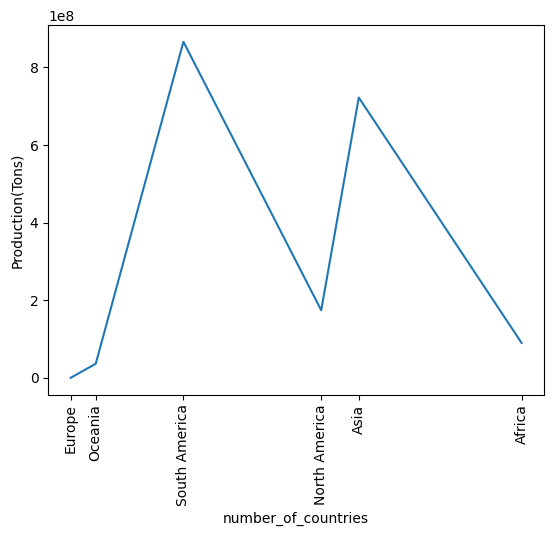

In [65]:
continent_names = df_continent.index.to_list()
sns.lineplot(data=df_continent,x='number_of_countries',y='Production(Tons)')
plt.xticks(df_continent['number_of_countries'],continent_names,rotation=90)
plt.show()

# Do continent with highest land produces more sugarcane?

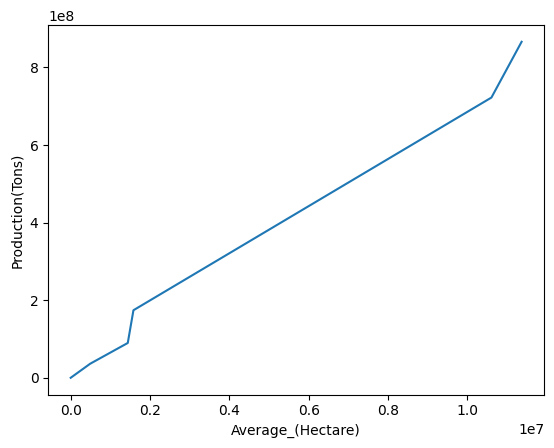

In [75]:
continent_names = df_continent.index.to_list()
sns.lineplot(data=df_continent,x='Average_(Hectare)',y='Production(Tons)')
plt.show()

# Production distribution by continent


<Axes: ylabel='Production(Tons)'>

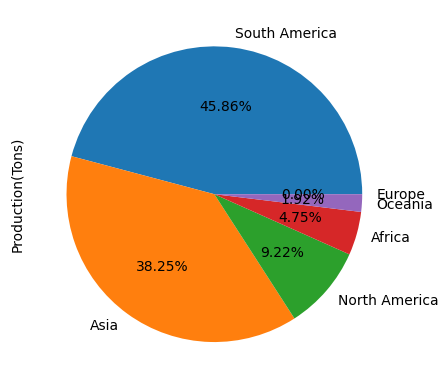

In [71]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%0.2f%%')

# Correlation for continent

In [70]:
df_continent.corr()

,Production(Tons),Production_per_Person_(Kg),Average_(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.143100,0.994897,0.104312,0.109244
Production_per_Person_(Kg),0.143100,1.000000,0.073059,0.514924,0.526387
Average_(Hectare),0.994897,0.073059,1.000000,0.126764,0.132817
Yield(Kg/Hectare),0.104312,0.514924,0.126764,1.000000,0.983807
number_of_countries,0.109244,0.526387,0.132817,0.983807,1.000000
